# Procesamiento de imágenes

Habiendo entendido lo básico de la manipulación de imágenes en Python, en este notebook haremos algunas operaciones típicas sobre imágenes:

* Transformaciones: (reescalado, rotación)
* filtrado
* detección de bordes
* segmentación


## Preámbulo

Siempre hay que cargar bibliotecas, etc.

In [7]:
import numpy as np
import skimage    # biblioteca 'entera'
import skimage.io # para cargar y guardar imágenes
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['figure.titlesize'] = 'small'

def mostrar_imagen(img,base_size=4,cmap='gray'):
    h,w = img.shape[:2]
    ar = w/h
    fw = int(base_size*ar)
    fh = base_size
    plt.figure(figsize=(fw,fh),facecolor='gray')    
    if len(img.shape)==2:     
        plt.imshow(img,cmap=cmap)
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()                                    



## Carga y recorte



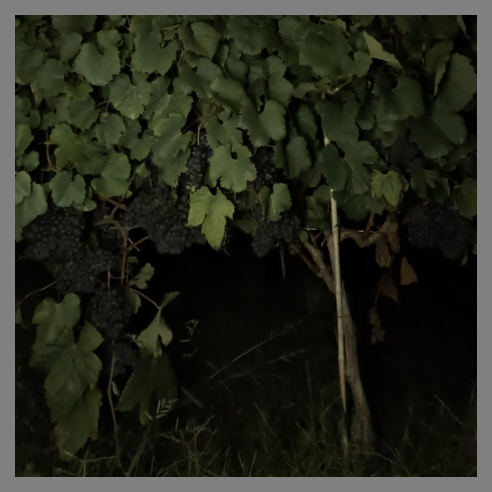

In [8]:
#
# cargamos la imagen -- directo de internet!
#
imagen = skimage.io.imread('http://iie.fing.edu.uy/~nacho/cursos/agro/frame_crudo.jpg')
#
# YA la convertimos a 0-1
#
imagen = imagen/255

#
#
# nos vamos a quedar con una parte de aquí en más
#
altura = imagen.shape[0]
ancho = imagen.shape[1]
recorte = altura-ancho # recorte para hacer la imagen cuadrada con la parte de abajo
imagen = imagen[recorte:,:]
#
# a ver
#
mostrar_imagen(imagen)

## Transformaciones

Las transformaciones en sí no tienen mucho misterio. La biblioteca `skimage.transform`  permite hacer transformaciones comunes como rotar, escalar, etc.
La sutileza que conviene considerar es la _calidad_  que uno desea obtener en la transformación: debido a que las imágenes son discretas en naturaleza,
salvo para algunos valores muy particulares de escalas (valores enteros) o rotaciones (múltiplos de 90), el resultado involucra una _interpolación_.

La diferencia puede ser muy importante según el tipo de interpolación que se utilice. Las más comunes son:

* Vecinos más cercanos (no interpolación): muy rápida y de mala calidad
* Interpolación lineal (también llamada _bilineal_): rápida y de calidad media
* Interpolación cúbica: velocidad media, alta calidad
* Lanczos: lenta y de máxima calidad
